In [2]:
#import requied dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
#reading the data from the source.
cars_df = pd.read_csv("cars.csv")

In [4]:
cars_df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


#EDA-Exploratory data analasiss

1.missing value identification

2.outlier detection

3.feature engineering

  1.scaling
  
  2.noramlisation
  
  3.encodeing
  
4.feature selection

5.spliting the data(x,y)

6.traing the data using traing data

7.testing the model using test data

8.clauclating the modle performance using evaluation matrix

In [5]:
cars_df.shape

(100, 13)

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [7]:
cars_df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [23]:
cars_df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [22]:
lb = LabelEncoder()

In [24]:
lb.fit(cars_df.Brand)

LabelEncoder()

In [25]:
cars_df['Brand'] = lb.fit_transform(cars_df.Brand)

In [26]:
cars_df.Brand.unique()

array([ 9,  3,  2,  6,  4,  8,  5, 10,  0,  1,  7])

In [27]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,3,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,2,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,6,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,4,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [28]:
cars_df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [29]:
lb.fit(cars_df.Model)

LabelEncoder()

In [30]:
cars_df['Model'] = lb.fit_transform(cars_df.Model)

In [31]:
cars_df.Model.unique()

array([15, 14, 30, 42, 41, 31, 40, 33,  4, 53, 11, 20, 16, 27, 21, 13, 47,
       34,  1, 25, 28, 22, 50,  7, 44, 32,  6, 54, 17, 23,  9, 19, 38, 51,
       52,  8,  3,  2, 26, 57, 36, 39, 46, 37, 10, 43, 35, 55, 24, 12, 49,
       45, 56, 48,  5,  0, 29, 18])

In [33]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,3,14,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,2,30,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,6,42,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,4,41,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [34]:
cars_df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [35]:
lb.fit(cars_df.Fuel_Type)

LabelEncoder()

In [36]:
cars_df['Fuel_Type'] = lb.fit_transform(cars_df.Fuel_Type)

In [37]:
cars_df.Fuel_Type.unique()

array([1, 0])

In [38]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,Manual,First,15,1498,108,5,800000
1,2,3,14,2019,40000,1,Automatic,Second,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,Automatic,First,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,Manual,Third,23,1248,74,5,600000
4,5,4,41,2016,60000,0,Automatic,Second,18,1999,194,5,850000


In [39]:
cars_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [40]:
lb.fit(cars_df.Transmission)

LabelEncoder()

In [41]:
cars_df['Transmission'] = lb.fit_transform(cars_df.Transmission)

In [42]:
cars_df.Transmission.unique()

array([1, 0])

In [43]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,First,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,Second,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,First,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,Third,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,Second,18,1999,194,5,850000


In [44]:
cars_df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

In [45]:
lb.fit(cars_df.Owner_Type)

LabelEncoder()

In [46]:
cars_df['Owner_Type'] = lb.fit_transform(cars_df.Owner_Type)

In [47]:
cars_df.Owner_Type.unique()

array([0, 1, 2])

In [48]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,0,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,2,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,1,18,1999,194,5,850000


{'whiskers': [<matplotlib.lines.Line2D at 0x270482fe550>,
 'caps': [<matplotlib.lines.Line2D at 0x270490e0160>,
 'boxes': [<matplotlib.lines.Line2D at 0x27048323ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2704a086eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2704846bd00>],
 'means': []}

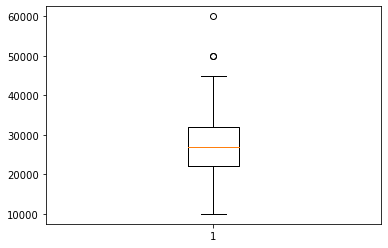

In [10]:
plt.boxplot(cars_df.Kilometers_Driven)

In [18]:
from scipy import stats

In [49]:
#detection the outliers using Z-score
def detect_outliers_zscore(df,threshold =3):
    outliers = {}
    for col in df.columns:
        z_scores = stats.zscore(df[col])
        outliers[col]= np.where(np.abs(z_scores) > threshold)[0]
    return outliers

In [60]:
out_det_Z = detect_outliers_zscore(cars_df,threshold=3)

In [56]:
def detect_outlier_iqr(df,threshold = 1.5):
    outlier = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-threshold * IQR
        upper_bound = Q3+threshold*IQR
        outlier[col]= df[(df[col] <lower_bound) | (df[col]>upper_bound)].index
    return outlier

In [57]:
detect_outlier_iqr(cars_df,threshold=1.5)

{'Car_ID': Int64Index([], dtype='int64'),
 'Brand': Int64Index([], dtype='int64'),
 'Model': Int64Index([], dtype='int64'),
 'Year': Int64Index([24, 62], dtype='int64'),
 'Kilometers_Driven': Int64Index([0, 4, 20], dtype='int64'),
 'Fuel_Type': Int64Index([], dtype='int64'),
 'Transmission': Int64Index([], dtype='int64'),
 'Owner_Type': Int64Index([], dtype='int64'),
 'Mileage': Int64Index([], dtype='int64'),
 'Engine': Int64Index([2], dtype='int64'),
 'Power': Int64Index([2, 38, 47, 50, 76, 85, 88], dtype='int64'),
 'Seats': Int64Index([2, 6, 11, 14, 20, 24, 29, 32, 44, 46, 50, 58, 62, 67, 70, 82, 84,
             88, 96],
            dtype='int64'),
 'Price': Int64Index([], dtype='int64')}

In [61]:
for col,indices in out_det_Z.items():
    print(f'{col}:{indices}')

Car_ID:[]
Brand:[]
Model:[]
Year:[]
Kilometers_Driven:[4]
Fuel_Type:[]
Transmission:[]
Owner_Type:[]
Mileage:[]
Engine:[2]
Power:[ 2 50 88]
Seats:[]
Price:[]


In [53]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,9,15,2018,50000,1,1,0,15,1498,108,5,800000
1,2,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,6,42,2020,30000,0,1,2,23,1248,74,5,600000
4,5,4,41,2016,60000,0,0,1,18,1999,194,5,850000


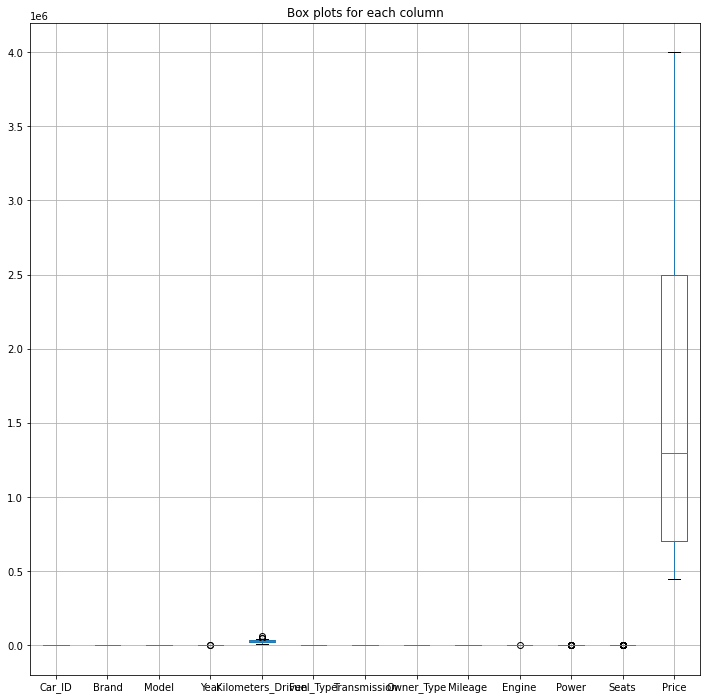

In [64]:
plt.figure(figsize=(12,12))
cars_df.boxplot()
plt.title("Box plots for each column")
plt.show()



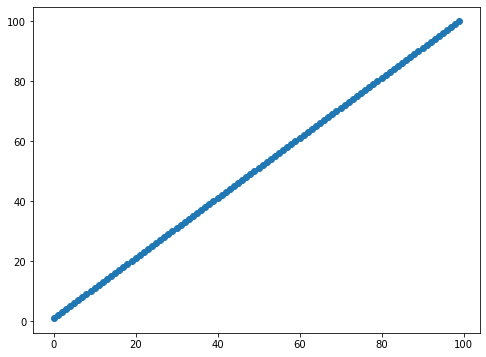

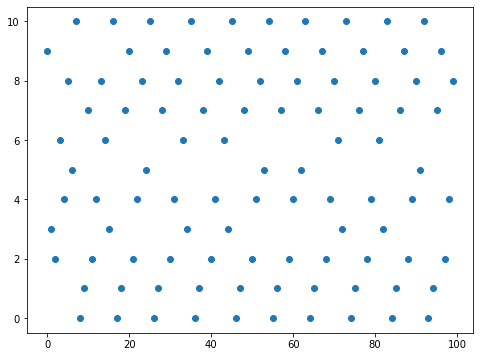

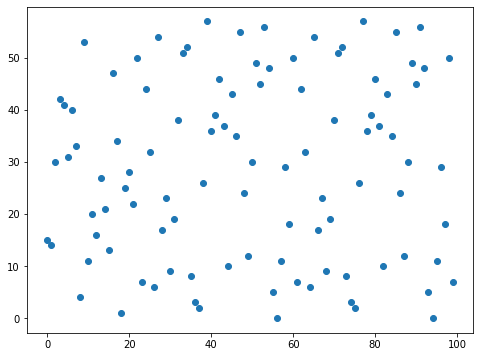

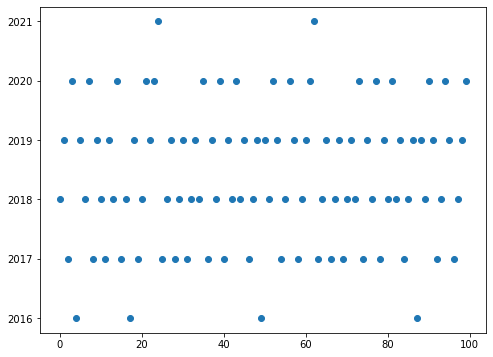

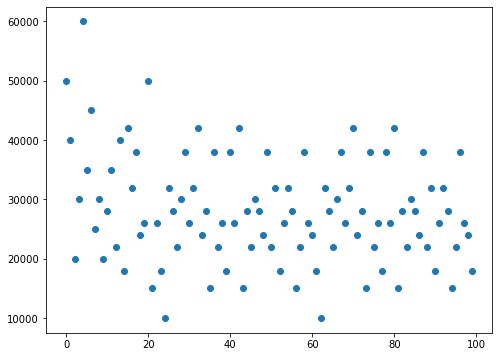

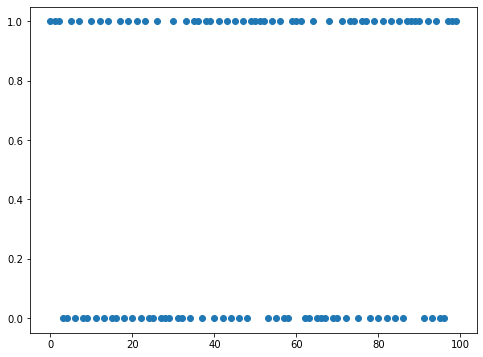

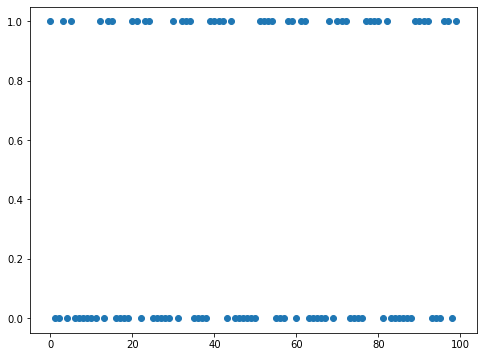

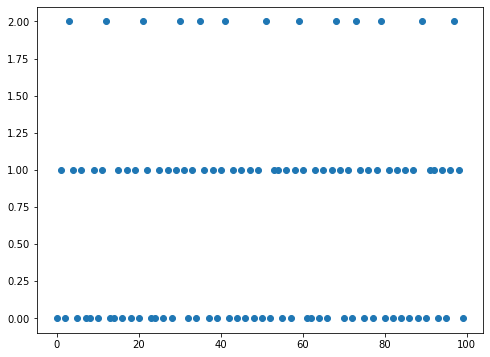

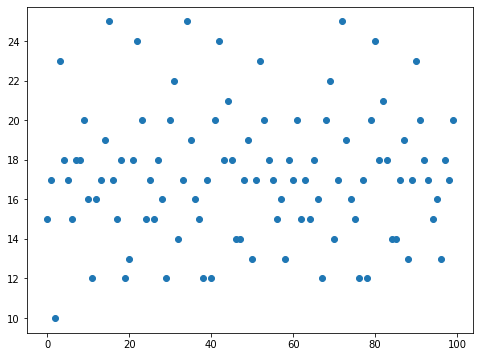

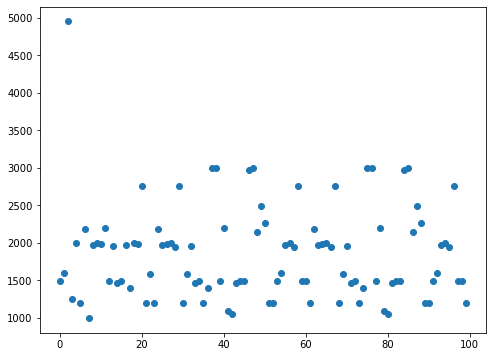

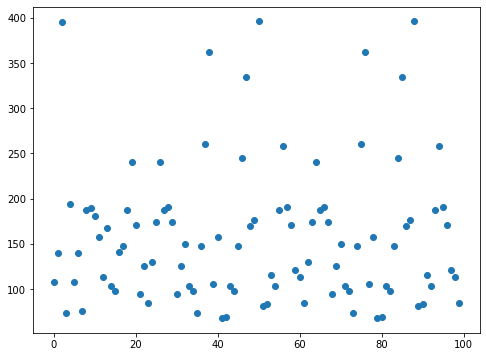

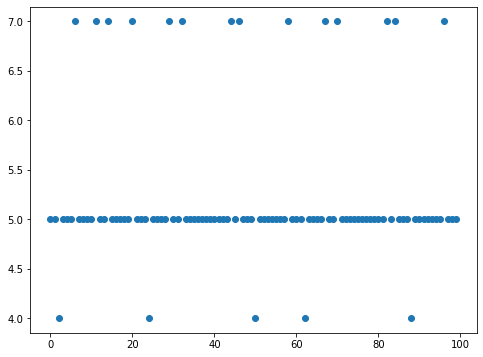

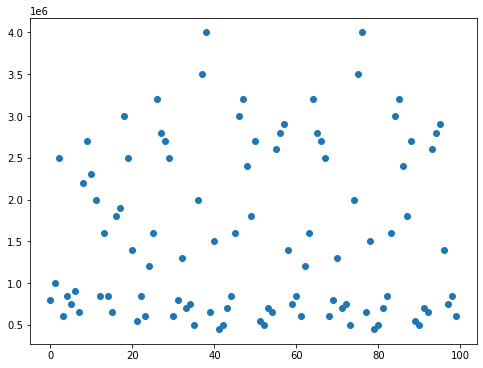

In [70]:

for col in cars_df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(cars_df.index,cars_df[col],label = cars_df[col])
    